## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)


In [1]:
# NOTE - This list of package imports is getting long
# In a professional setting you would only want to 
#      import what you need!

# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import Ridge, Lasso

## Train a Model on Demo Data

Here we will see a model that does quite well on a training set, but not as well on the testing set. Where we seem to overfit even with a very simple model.

In [2]:
file = 'https://joannabieri.com/data201/data/linear_reg_demp.csv'
df = pd.read_csv(file)
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,y
0,-1.342024,2.644872,2.731009,-2.643724,-0.356181,2.350662,-2.951172,2.328301,4.066488,4.538268,...,3.252113,-2.410185,1.117097,0.171368,0.698699,-1.203474,0.293631,-3.224743,-2.638178,2.068888
1,-0.962461,-0.885964,3.331960,-0.899836,-2.657224,0.611735,2.106507,4.374248,2.113490,0.520471,...,1.735759,-0.550186,-1.157524,2.982892,0.215629,-1.582387,-3.858339,0.687370,0.170460,14.604536
2,0.424560,0.416815,0.111514,0.421216,1.493705,-0.196899,-0.610448,0.003991,0.306564,0.767867,...,0.328082,-0.342343,0.460536,-0.361867,-0.354331,0.109588,0.622223,-0.275862,-0.385733,-2.161666
3,-0.531133,-3.208629,1.084534,2.353597,0.007463,-3.221481,-0.728961,1.523102,-0.455153,-2.709579,...,1.971500,-2.350100,2.846246,3.816032,-0.863181,-0.675704,0.146581,1.776943,0.878032,5.124691
4,0.411236,1.247723,-0.041707,1.247229,3.315608,-1.163993,-0.769326,0.372504,0.402942,2.628126,...,-0.135925,-1.825401,3.072627,-0.973546,-0.484639,0.339584,1.220820,-0.253012,-1.032695,-7.629544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.434508,0.097347,-1.353913,-0.207688,-1.210280,0.125185,1.282331,-0.784026,-1.352825,-0.337206,...,-2.098063,0.644308,0.174951,-1.056514,0.819055,0.494306,-0.587877,0.479324,0.521405,-4.015535
196,-2.851576,4.059801,1.523292,-5.085669,-2.971662,3.915679,-3.495266,1.038668,3.826526,5.511904,...,1.534703,-2.427997,1.894649,-1.491945,2.542125,-1.074327,0.463561,-4.676907,-3.010609,-1.711600
197,1.199517,-0.345678,1.260737,2.137194,1.652054,-1.654168,5.736806,3.802432,-0.385061,1.452547,...,-1.948709,0.467006,-0.193887,0.559777,-0.762078,-0.091667,-4.458026,3.310913,1.052443,5.045598
198,-0.305365,-1.346562,1.750246,-0.301057,-2.059367,0.317157,1.114768,2.042436,0.857123,-1.329480,...,1.434269,0.300923,-1.778999,2.292379,-0.281260,-0.972267,-2.150849,0.665495,0.416339,10.176725


In [3]:
df.shape

(200, 51)

In [4]:
df.keys()

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'y'],
      dtype='object')

In [5]:
x_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49']
y_cols = ['y']

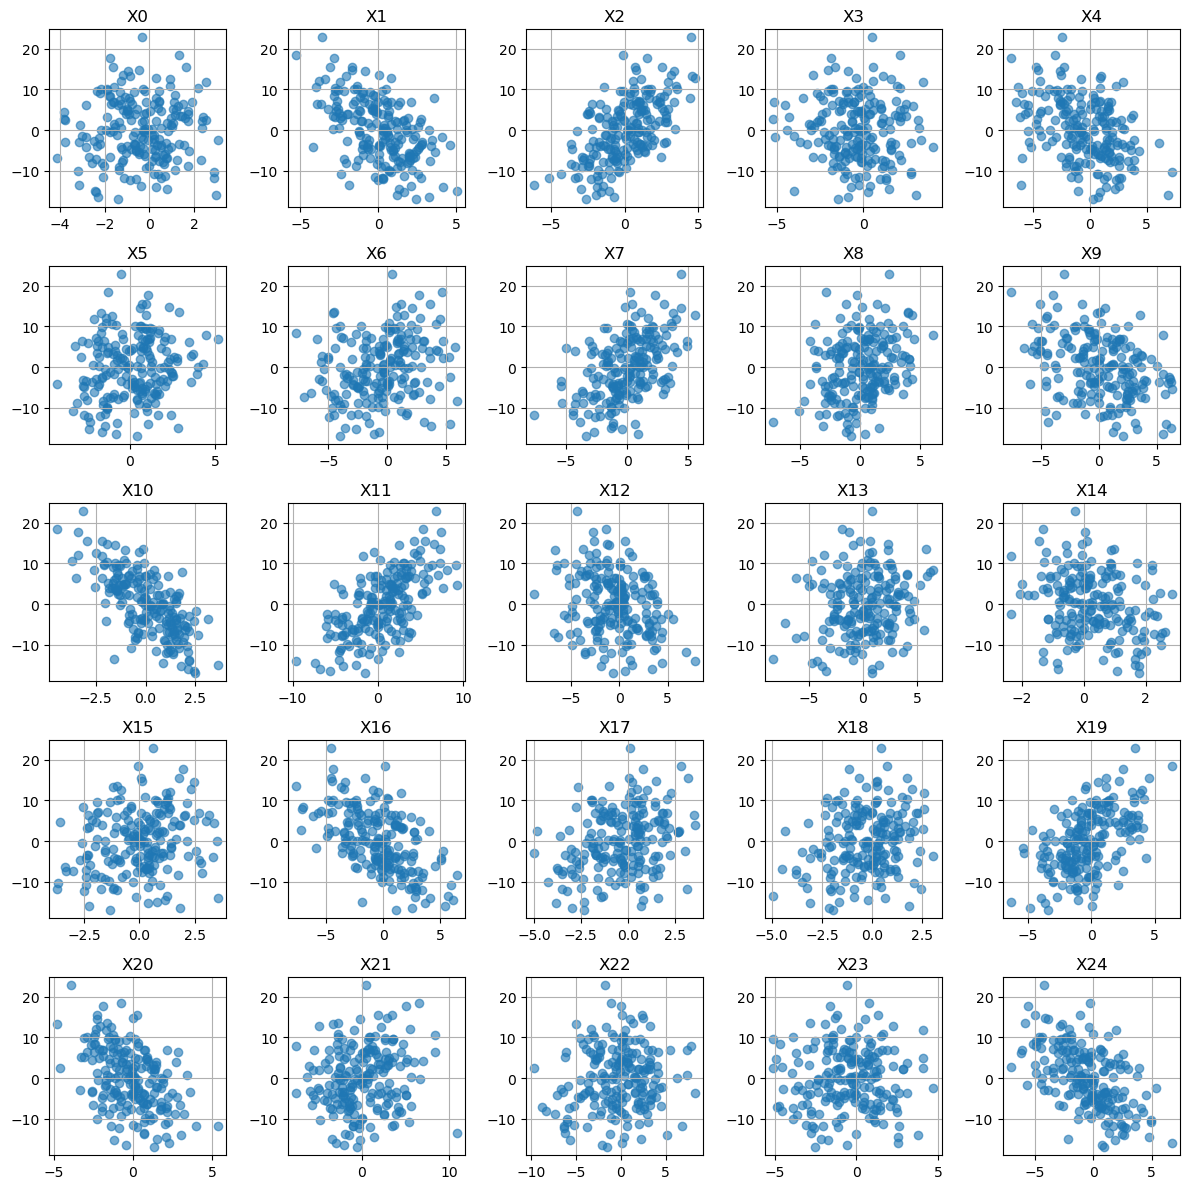

In [6]:
# Plot all of the features y as a function of Xn.
# Here I did not do SNS because we have 50 features and that is a lot!

fig, ax = plt.subplots(5, 5, figsize=(12, 12)) 
ax = ax.flatten()  # turn 2D array of axes into 1D list

for col, a in zip(x_cols, ax):
    a.scatter(df[col], df[y_cols], alpha=0.6)
    a.set_title(col)
    a.grid(True)

plt.tight_layout()
plt.show()

It seems like a linear regression might work here!

## Test Train VALIDATE split

As we get more advanced in our machine learning we are going to start doing a lot of hyperparameter tuning. When we tune we need a test set that technically our model gets to see during training (a part of the data set that helps us choose our parameters - before the official test at the end). This is the validation set!

Training Set - used to fit/train the model and find the model parameters.
Validation Set - used to check for over/undertraining and to select the best hyperparameters.
Testing Set - used to truly test the model at the end.

In [7]:


# Test Train VALIDATE Split
X = df[x_cols]
y = df[y_cols]

random_seed = 42
# First split: hold out test data
X_train, X_test_full, y_train, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=random_seed
)

# Second split: create a validation set from the testing data
X_test, X_val, y_test, y_val = train_test_split(
    X_test_full, y_test_full, test_size=0.5, random_state=random_seed
)
# (Hold out data so that final proportions are 80% train / 10% val / 10% test)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 160, Validation: 20, Test: 20


In [8]:
# Poly Features - choose the order of your polynomial
degree = 1
poly = PolynomialFeatures(degree=degree,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
# transform the validation set
X_val_poly = poly.transform(X_val)


# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

# --- Get predictions Training ---
y_pred_train = linreg.predict(X_train_poly)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"MSE on train set: {mse:.3f}")
print(f"R² on train set: {r2:.3f}")

# --- Get predictions TTesting ---
y_pred_val = linreg.predict(X_val_poly)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"MSE on val set: {mse:.3f}")
print(f"R² on val set: {r2:.3f}")

MSE on train set: 0.578
R² on train set: 0.990
MSE on val set: 1.757
R² on val set: 0.977


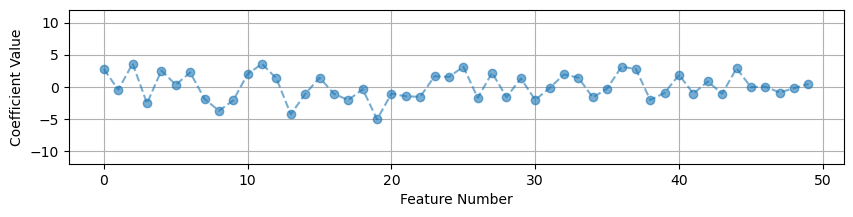

In [9]:
# Look at the magnitude of the coefficients
coef = linreg.coef_
coef_linreg_noscale = coef.reshape(-1)

x_pos = range(poly.n_output_features_)
plt.figure(figsize=(10,2))
plt.plot(x_pos, coef_linreg_noscale, '--o', alpha=.6)
plt.grid()
plt.ylim(-12,12)
plt.ylabel('Coefficient Value')
plt.xlabel('Feature Number')
plt.show()

## What Do We Notice?

We do really quite well on the training set! We have a small MSE and an $R^2$ close to 1. But when we look at the testing set our MSE goes up quite a bit. Our $R^2$ indicates that we are capturing most of the variance in the model, but we have significantly more error overall in the testing set (almost 4 times the error!)

A more complicated model probably won't help, based on our good $R^2$ values, but we could try degree 2 or higher.


## Scaling or Normalizing the Data

One of the first things you should do in machine learning is scale your feature data. When your features have very different ranges for their maximum and minimum values this can really effect your models ability to learn. You want to aim to have the values of your features be close to the range of $-1$ to $1$. 


### Look at our ranges:

In [10]:
# Look at the max and min values for each feature
pd.DataFrame(X_train,columns=x_cols).agg(['max', 'min'])

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49
max,3.074681,5.015530,4.765435,4.072882,7.224084,5.173071,5.898216,5.549610,6.122514,6.221691,...,7.937595,7.118241,5.982261,9.164175,5.577571,3.636078,2.152546,5.413475,3.747611,3.173226
min,-4.127328,-4.210942,-6.158104,-5.234811,-6.943052,-4.255686,-7.784148,-7.611358,-7.250116,-5.981741,...,-8.198117,-7.866397,-7.156067,-7.745289,-5.472321,-2.761265,-2.012445,-4.458026,-5.212075,-3.735093



Notice how the some of the variables have very different ranges for their max and min. This is very bad for machine learning! If your variables have drastically different scales then features with large numerical ranges can cause problems. 

For example, when calculating distances in KNN - if some of your data had units of centimeters and went up to 10 and some of your data had units of dollars but went up to the millions - your distance calculations could be really skewed!

## Scale the Data

Often we scale our data so that it is closer to the range $[-1,1]$. Standard scalar is one way to do that:

**StandardScaler** rescales features to have:

$$
\text{mean} = 0, \quad \text{standard deviation} = 1
$$

For each feature \(x\):

$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation of that feature.

**ALWAYS SCALE YOUR FEATURE DATA!!** From here on out, this should be a part of every model that you write with very few exceptions.

In [11]:
# New package
from sklearn.preprocessing import StandardScaler

# Define the Scalar
scaler = StandardScaler()

# Find mu and sigma using your training data
# Also transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# transform the validation set
X_val_scaled = scaler.transform(X_val)

In [12]:
# Look at the max and min values for each feature
pd.DataFrame(X_train_scaled,columns=x_cols).agg(['max', 'min'])

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49
max,2.223363,2.609658,2.392681,2.360715,2.809527,2.798811,2.241920,2.420819,2.696811,2.045045,...,2.766322,2.885869,2.518609,2.527666,2.877369,2.64141,2.566428,2.343031,2.132623,2.324403
min,-2.438043,-2.364959,-3.109346,-2.635794,-2.444313,-2.434600,-2.594407,-3.308312,-3.343718,-2.128302,...,-2.872106,-3.294472,-2.688017,-2.405527,-2.812342,-2.36236,-2.199528,-2.086580,-2.545328,-2.427530


Now these are not exactly between positive and negative 1, but they are closer and much more consistent across variables!

Let's see if this helps our model:

In [13]:
# Redo the analysis

# Poly Features
degree = 1
poly = PolynomialFeatures(degree=degree,include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

# --- Get predictions Training ---
y_pred_train = linreg.predict(X_train_poly)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"MSE on train set: {mse:.3f}")
print(f"R² on train set: {r2:.3f}")

# --- Get predictions Testing ---
y_pred_val = linreg.predict(X_val_poly)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"MSE on val set: {mse:.3f}")
print(f"R² on val set: {r2:.3f}")

MSE on train set: 0.578
R² on train set: 0.990
MSE on val set: 1.757
R² on val set: 0.977


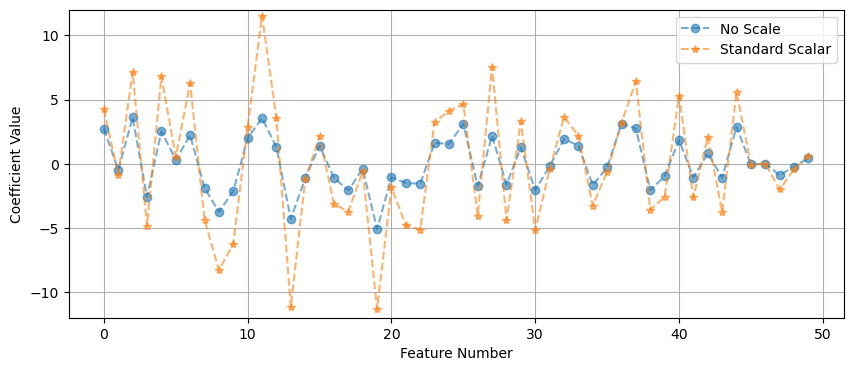

In [14]:
coef = linreg.coef_
coef_linreg_scale = coef.reshape(-1)

# Look at the magnitude of the coefficients

x_pos = range(poly.n_output_features_)
plt.figure(figsize=(10,4))
plt.plot(x_pos, coef_linreg_noscale, '--o', alpha=.6, label='No Scale')
plt.plot(x_pos, coef_linreg_scale, '--*', alpha=.6, label='Standard Scalar')
plt.grid()
plt.ylim(-12,12)
plt.ylabel('Coefficient Value')
plt.xlabel('Feature Number')
plt.legend()
plt.show()

In this case it did not do much for our MSE, because of the synthetic nature of the data... the variables were already on a similar range. But if you had some variables that were really large and some really small - then scaling the data is a MUST.

But we do see a change in the size of our coefficients. The overall size of the features changes the values of the coefficients. 

## Regularization

Regularization is a way to help stop your model from overfitting. Sometimes we see overfitting even when we have picked a very good model and it helps to add an extra penalty to the model to help it generalize better to new data.

So as we keep increasing the polynomial we are doing better on the training data, but we are getting worse and worse on the testing data. Our linear model was the best model, but it still overfits!

Why does this happen? In this case we are relying on a model that has poor feature selection. Too many features or features that are highly correlated, this is called multicollinearity. The features are highly correlated and there are some features that really don't really effect the model.


Let's consider the things that can go wrong in a model.


## Where does error come from

The Total Error in a model is the sum of three types of error:

$$ 
BIAS + VARIANCE + IRREDUCIBLE = TOTAL
$$

- Bias is the generalization error due to wrong assumptions and simplifications for your model. HIGH BIAS = underfit
- Variance is the error due to excessive sensitivity  to small variations on the training data. HIGH VARIANCE = overfit
- Irreducible Error is the noisiness of the data itself.

Increasing a models complexity will reduce the bias but increase the variance... there is always a trade-off here!

But what do we do if we are happy with our choice of polynomial or model but still see overfitting?

## Types of Regularization

Regularization helps to reduce overfitting and improves the generalizability of a model. It is almost always a good idea to add regularization to a model. 

There are many ways to do this. Today we will talk about three that work well whenever your model has linear coefficients.

**YOU MUST SCALE YOUR DATA BEFORE APPLYING REGULARIZATION**


## 1. Linear Regression (AKA Ordinary Least Squares (OLS))

Recall that linear regression minimizes the square error between predicted values and true values. We aim to minimize the loss in our model. Linear regression fits coefficients $b_0, b_1, ..., b_p$ by minimizing:

$$
\text{Loss} = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 
$$

where  

$$
\hat{y}_i = b_0 + b_1 x_{i1} + b_2 x_{i2} + \dots + b_p x_{ip} 
$$

This method finds coefficients that make the predicted values $\hat{y}_i$ as close as possible to the observed values $y_i$.

However, if you have many features or highly correlated ones, this can overfit, it may give large, unstable coefficients.

 
## 2. Ridge Regression (L2 Regularization)

Ridge regression adds a penalty on the **squared size** of the coefficients:

$$
\text{Loss} = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{j=1}^{p} b_j^2 
$$

The tuning parameter $\alpha$ controls how strong the penalty is:

- When $\alpha = 0$, this is just linear regression.
- When $\alpha$ is large, the coefficients shrink toward zero.

- Ridge keeps *all features* in the model (no coefficients become exactly zero).
- It helps when predictors are correlated.
- It works well when many variables each have small effects.

## 3. Lasso Regression (L1 Regularization)

Lasso regression adds a penalty on the **absolute values** of the coefficients:

$$
\text{Loss} = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{j=1}^{p} |b_j| 
$$

- Lasso can shrink some coefficients **exactly to zero**, effectively removing those features from the model.
- It performs **feature selection** automatically.
- It works well when only a few predictors are truly important (a "sparse" model).


## 4. Elastic Net (Combination of L1 and L2)

Elastic Net blends the Ridge and Lasso penalties:

$$
\text{Loss} = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
+ \alpha \left[L1 \sum_{j=1}^{p} |b_j| + (1 - L1) \sum_{j=1}^{p} b_j^2 \right]
$$

- $\alpha$ controls the overall strength of regularization.
- $L1$ controls the mix between Ridge (L2) and Lasso (L1):
  - $L1 = 1$ → Lasso
  - $L1 = 0$ → Ridge
  - $0 < L1 < 1$ → Elastic Net (a blend)

Elastic Net helps when you have many correlated predictors and still want some feature selection.

## Summary Table

| Model        | Penalty Term                      | Coefficients Become Zero? | Good For |
|---------------|-----------------------------------|----------------------------|-----------|
| Linear Regression (OLS)           | None                              | No                         | Baseline fitting |
| Ridge         | $\alpha \sum \beta_j^2$          | No                         | Multicollinearity |
| Lasso         | $\alpha \sum |\beta_j|$          | Yes                        | Feature selection |
| Elastic Net   | Mix of L1 and L2 penalties        | Some                       | Many correlated predictors |


 
Regularization trades off bias for variance reduction, improving generalization performance on new data.

- **Ridge** regression: Use when you expect *many small* effects and have *correlated predictors*.  
- **Lasso** regression: Use when you expect *only a few features to matter* and want *feature selection*.  
- **Elastic Net**: Use when you want *a balance* — some sparsity and some stability.


Let's look at each of these!


Model Performance:


,MSE Train,MSE val,R² Train,R² val
Linear,0.578109,1.756675,0.989989,0.976960
Ridge (α=10),0.852579,1.152552,0.985236,0.984883
Lasso (α=0.1),0.894241,1.267345,0.984515,0.983378
"Elastic Net (α=0.1, mix=0.5)",2.806273,4.364667,0.951405,0.942754


<Figure size 1000x600 with 0 Axes>

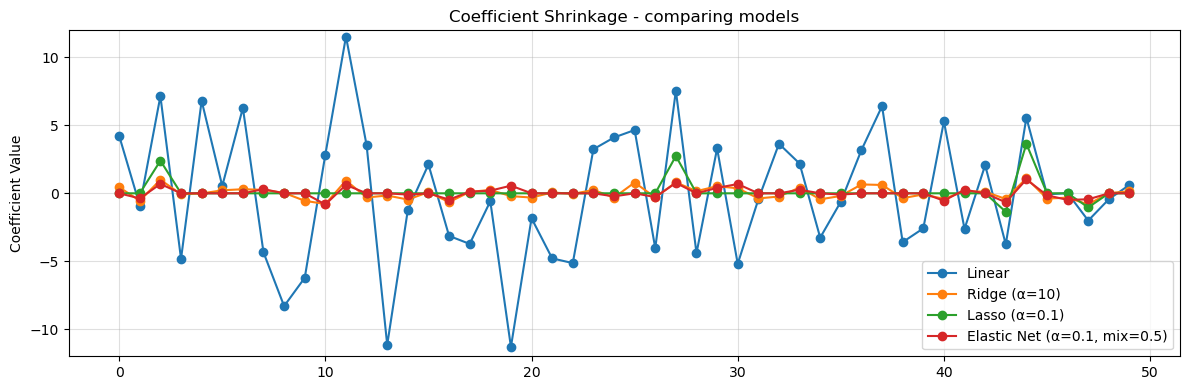

In [15]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Decide on polynomial features here we keep degree=1
degree = 1
poly = PolynomialFeatures(degree=degree,include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)


# Lets make a dictionary of each of the models I want to try
models = {
    "Linear": LinearRegression(),
    "Ridge (α=10)": Ridge(alpha=1),
    "Lasso (α=0.1)": Lasso(alpha=.1),
    "Elastic Net (α=0.1, mix=0.5)" : ElasticNet(alpha=1.0, l1_ratio=0.5)
}

# Some dictionaries to save the results
results = {}
coefs = {}

# Train each model
for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    y_pred_val = model.predict(X_val_poly)
    # Save results for testing and training data
    results[name] = {
        "MSE Train": mean_squared_error(y_train, y_pred_train),
        "MSE val": mean_squared_error(y_val, y_pred_val),
        "R² Train": r2_score(y_train, y_pred_train),
        "R² val": r2_score(y_val, y_pred_val)
    }
    coefs[name] = model.coef_

# Compare the models
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
display(results_df)

# Visualize the coefficient size
plt.figure(figsize=(10,6))
col_names = poly.get_feature_names_out(X.columns)
x_pos = np.arange(len(col_names))

plt.figure(figsize=(12,4))

for name, coef in coefs.items():
    plt.plot(x_pos, coef.reshape(-1), marker='o', label=name)

plt.title("Coefficient Shrinkage - comparing models")
plt.ylabel("Coefficient Value")
plt.ylim(-12,12)
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

## Observations

What we notice is that regularization reduces the size of the coefficients. In the data we see less overfitting, the MSE on training is closer to what we see in testing and we have not hurt our $R^2$ values. This means that our model is more likely to generalize to new data.

We now have more hyperparameters! We have to decide on values for $\alpha$ and in the case of elastic net $L1$. How do we figure out what value of alpha to use?

## Searching for Alpha - Ridge

Let's do an example of finding alpha values for our ridge regression


Model Performance:


,MSE Train,MSE Val,R² Train,R² Val
alpha = 0.0,0.578109,1.756675,0.989989,0.976960
alpha = 0.1,0.703788,1.246276,0.987813,0.983654
alpha = 0.2,0.757307,1.189517,0.986886,0.984398
alpha = 0.30000000000000004,0.786855,1.169877,0.986374,0.984656
alpha = 0.4,0.805903,1.161131,0.986045,0.984771
...,...,...,...,...
alpha = 49.5,0.980071,1.437672,0.983029,0.981144
alpha = 49.6,0.980387,1.438457,0.983023,0.981133
alpha = 49.7,0.980705,1.439242,0.983018,0.981123
alpha = 49.800000000000004,0.981023,1.440028,0.983012,0.981113


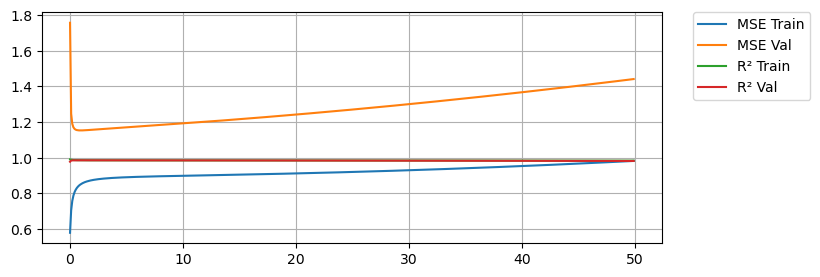

In [16]:
alpha_vals = np.arange(0,50,.1)
results = {}

for a in alpha_vals:

    if a == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=a)
    model.fit(X_train_poly, y_train)

    y_pred_train = model.predict(X_train_poly)
    y_pred_val = model.predict(X_val_poly)
    results[f"alpha = {a}"] = {
        "MSE Train": mean_squared_error(y_train, y_pred_train),
        "MSE Val": mean_squared_error(y_val, y_pred_val),
        "R² Train": r2_score(y_train, y_pred_train),
        "R² Val": r2_score(y_val, y_pred_val)
    }

results_df = pd.DataFrame(results).T
print("\nModel Performance:")
display(results_df)

plt.figure(figsize=(8,3))
for c in results_df.keys():
    plt.plot(alpha_vals,results_df[c],label=c)

#plt.xticks(alpha_vals)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

Here we see that with no regularization we do very good on training MSE (Orange) but significantly worse on the testing MSE (Blue). In both cases we are capturing the variance in the data as shown by our $R^2$ values being close to 1. A little bit of regularization goes a long way. We see that as we add regularization, we start to do better and better on the testing MSE, but only for a while. As we keep increasing regularization we start to do worse again on the testing data, so we are looking for an $\alpha$ that gives us the best results on the testing data.

In [17]:
min_MSE = 1000
for a in results.keys():
    mse_val = results[a]['MSE Val']
    if mse_val < min_MSE:
        min_MSE = mse_val
        best_alpha = a

print(f'Min MSE on validation set was {min_MSE} with an alpha of {best_alpha}')

Min MSE on validation set was 1.152518499494026 with an alpha of alpha = 0.9




## Searching for Alpha - Lasso

Let's do an example of finding alpha values for our lasso regression


Model Performance:


,MSE Train,MSE val,R² Train,R² val
alpha = 0.0,0.578109,1.756675,0.989989,0.976960
alpha = 0.05,0.875297,1.224568,0.984843,0.983939
alpha = 0.1,0.894241,1.267345,0.984515,0.983378
alpha = 0.15000000000000002,0.924844,1.325755,0.983985,0.982612
alpha = 0.2,0.967675,1.398712,0.983243,0.981655
alpha = 0.25,1.022748,1.486174,0.982290,0.980508
alpha = 0.30000000000000004,1.091776,1.577950,0.981094,0.979304
alpha = 0.35000000000000003,1.173528,1.682930,0.979679,0.977927
alpha = 0.4,1.267808,1.802420,0.978046,0.976360
alpha = 0.45,1.372751,1.943044,0.976229,0.974515


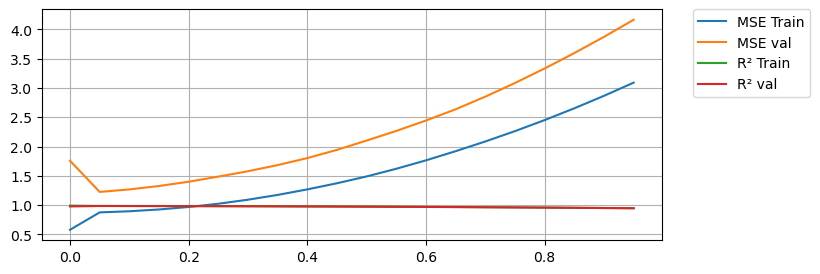

In [18]:
alpha_vals = np.arange(0,1,.05)
results = {}

for a in alpha_vals:
    if a == 0:
        model = LinearRegression()
    else:    
        model = Lasso(alpha=a,max_iter=10000)
    model.fit(X_train_poly, y_train)

    y_pred_train = model.predict(X_train_poly)
    y_pred_val = model.predict(X_val_poly)
    results[f"alpha = {a}"] = {
        "MSE Train": mean_squared_error(y_train, y_pred_train),
        "MSE val": mean_squared_error(y_val, y_pred_val),
        "R² Train": r2_score(y_train, y_pred_train),
        "R² val": r2_score(y_val, y_pred_val)
    }

results_df = pd.DataFrame(results).T
print("\nModel Performance:")
display(results_df)

plt.figure(figsize=(8,3))
for c in results_df.keys():
    plt.plot(alpha_vals,results_df[c],label=c)

#plt.xticks(alpha_vals)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

In [19]:
min_MSE = 1000
for a in results.keys():
    mse_val = results[a]['MSE val']
    if mse_val < min_MSE:
        min_MSE = mse_val
        best_alpha = a

print(f'Min MSE on validation set was {min_MSE} with an alpha of {best_alpha}')

Min MSE on validation set was 1.2245683950321071 with an alpha of alpha = 0.05


Again we see regularization improve the results at first. Notice how Lasso is more sensitive to the alpha value! We also see how too much Lasso hurts the training results too.

## You Try

Write a loop to do a parameter search for Elastic net. You will need to do a double for loop and search through two sets of parameters: $\alpha$ and $L1$. 

## Other Considerations

For all of the analysis above we assumed degree = 1 for our polynomial. It might be worth rerunning the code above to see if we could get better results with a higher degree polynomial.


## Now test the model

Once you choose an alpha value for your regularization and you are fairly certain that you have the best possible model for your goals, then you are ready to see how you do on the testing set.

**This is the actual model that you report - your final results!** Everything above is important to do and talk about (eg. show some plots), but your results is the final best model you could train and it's performance on the testing set.

In [21]:
alpha = .9
degree = 1

# Do ALL THE SAME PREPROCESSING STEPS!
# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Feature Engineering - polynomials
poly = PolynomialFeatures(degree=degree,include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


# Train the model
model = Ridge(alpha=alpha)
model.fit(X_train_poly, y_train)

# Get the training results
y_pred_train = linreg.predict(X_train_poly)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"MSE on train set: {mse:.3f}")
print(f"R² on train set: {r2:.3f}")

# Get the testing results
y_pred_test = linreg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")


MSE on train set: 0.578
R² on train set: 0.990
MSE on test set: 2.189
R² on test set: 0.947
